In [63]:
import numpy as np
def U(a,b): return (b-a)*np.random.uniform(0,1) + a

In [64]:
# part a
def rho(x,y): return (20/13.)*(x+y)

n     = 1000
m     = 0
n0    = 0
sumf  = 0
sumf2 = 0

for i in range(n):
    x = U(0,1)
    y = U(0,1)
    z = U(0,2*20/13.) # this is for hit-or-miss
    if x >= 0 and y <= 1 and y >= (x*x):
        m     += 1
        sumf  += rho(x,y)
        sumf2 += rho(x,y)**2
        if z <= rho(x,y): n0 += 1 # this is for hit-or-miss

## crude            
meanf   = sumf/m
sigmaf2 = (sumf2/m - meanf**2)*m/(m-1)
sigmaf  = sigmaf2**0.5
V  = 2/3.
I  = V*meanf
dI = V*sigmaf/m**0.5
print('V = %2.4f approximated as %2.4f'%(2/3., m/n))
print('I = %2.4f +/- %2.4f'%(I,dI))

## hit-or-miss            
V  = 2*(20/13.)
p  = n0/n
I  = V*n0/n
dI = V*(p-p*p)**0.5/n**0.5
print('I = %2.4f +/- %2.4f'%(I,dI))

V = 0.6667 approximated as 0.6530
I = 1.0051 +/- 0.0171
I = 0.9969 +/- 0.0455


In [67]:
# part b
k = 12/31.
def rho(x,y,z): return (k)*(x**2 + y*z)

n     = 1000
n0    = 0
sumf  = 0
sumf2 = 0

for i in range(n):
    x = U(0,1)
    y = U(1,2)
    z = U(1,2)
    w = U(0,k*5) # this is for hit-or-miss
    sumf  += rho(x,y,z)
    sumf2 += rho(x,y,z)**2
    if w <= rho(x,y,z): n0 += 1 # this is for hit-or-miss

# crude 
meanf   = sumf/n
sigmaf2 = (sumf2/n - meanf**2)*(n/(n-1))
sigmaf  = sigmaf2**0.5
V  = 1
I  = V*meanf
dI = V*sigmaf/n**0.5
print('I = %2.4f +/- %2.4f'%(I,dI))

# hit-or-miss
p = n0/n
V = (k)*5
I  = V*p
dI = V*(p-p*p)**0.5/n**0.5
print('I = %2.4f +/- %2.4f'%(I,dI))

I = 1.0065 +/- 0.0083
I = 1.0200 +/- 0.0306


In [69]:
import matplotlib.pyplot as plt

uncertainty in 4a crude is: 0.0169


(array([  18.,   53.,  292.,  663., 1089., 1052.,  600.,  187.,   39.,
           7.]),
 array([0.94034915, 0.95256002, 0.9647709 , 0.97698177, 0.98919264,
        1.00140352, 1.01361439, 1.02582526, 1.03803614, 1.05024701,
        1.06245788]),
 <a list of 10 Patch objects>)

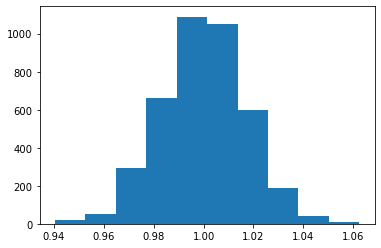

In [75]:
# brute force estimation of the uncertainty for 4a crude
def I4aCrude():
    def rho(x,y): return (20/13.)*(x+y)
    m     = 0
    sumf  = 0
    for i in range(n):
        x = U(0,1)
        y = U(0,1)
        if x >= 0 and y <= 1 and y >= (x*x):
            m     += 1
            sumf  += rho(x, y)
    meanf   = sumf/m
    V  = 2/3.
    I  = V*meanf
    return I

arrayI4aCrude = np.array([I4aCrude() for i in range (4000)])
print('uncertainty in 4a crude is: %2.4f'%arrayI4aCrude.std())  
plt.hist(arrayI4aCrude)

uncertainty in 4a HOM is: 0.0453


(array([   5.,   25.,  169.,  522., 1018., 1179.,  716.,  281.,   73.,
          12.]),
 array([0.82153846, 0.85569231, 0.88984615, 0.924     , 0.95815385,
        0.99230769, 1.02646154, 1.06061538, 1.09476923, 1.12892308,
        1.16307692]),
 <a list of 10 Patch objects>)

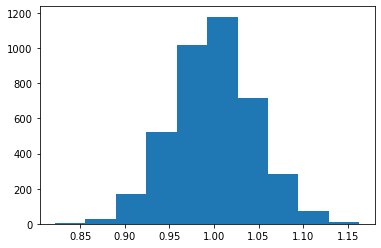

In [79]:
# brute force estimation of the uncertainty for 4a hit-or-miss
def I4aHOM():
    def rho(x,y): return (20/13.)*(x+y)

    n     = 1000
    n0    = 0

    for i in range(n):
        x = U(0,1)
        y = U(0,1)
        z = U(0,2*20/13.)
        if x >= 0 and y <= 1 and y >= (x*x):
            if z <= rho(x,y): n0 += 1


    ## hit-or-miss            
    V  = 2*(20/13.)
    p  = n0/n
    I  = V*n0/n
    return I 
    
arrayI4aHOM = np.array([I4aHOM() for i in range (4000)])
print('uncertainty in 4a HOM is: %2.4f'%arrayI4aHOM.std())  
plt.hist(arrayI4aHOM)

uncertainty in 4b crude is: 0.0084


(array([  10.,   85.,  302.,  719., 1070.,  957.,  598.,  209.,   41.,
           9.]),
 array([0.97144755, 0.97733645, 0.98322535, 0.98911425, 0.99500315,
        1.00089204, 1.00678094, 1.01266984, 1.01855874, 1.02444764,
        1.03033654]),
 <a list of 10 Patch objects>)

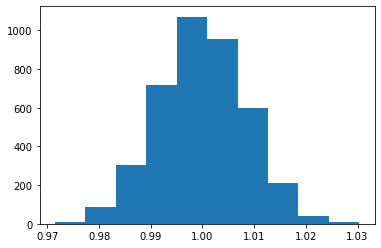

In [82]:
# brute force estimation of the uncertainty for 4b crude
def I4bCrude():
    k = 12/31.
    def rho(x,y,z): return (k)*(x**2 + y*z)

    n     = 1000
    sumf  = 0
    sumf2 = 0

    for i in range(n):
        x = U(0,1)
        y = U(1,2)
        z = U(1,2)
        sumf  += rho(x,y,z)
        sumf2 += rho(x,y,z)**2

    # crude 
    meanf   = sumf/n
    sigmaf  = sigmaf2**0.5
    V  = 1
    I  = V*meanf
    return I
 
arrayI4bCrude = np.array([I4bCrude() for i in range (4000)])
print('uncertainty in 4b crude is: %2.4f'%arrayI4bCrude.std())  
plt.hist(arrayI4bCrude)    

uncertainty in 4b HOM is: 0.0305


(array([4., 2., 3., 4., 5., 8., 7., 3., 2., 2.]),
 array([0.93677419, 0.94935484, 0.96193548, 0.97451613, 0.98709677,
        0.99967742, 1.01225806, 1.02483871, 1.03741935, 1.05      ,
        1.06258065]),
 <a list of 10 Patch objects>)

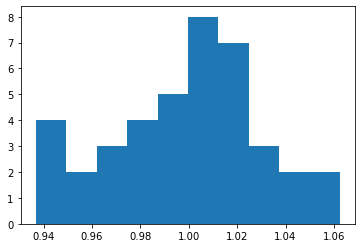

In [85]:
# brute force estimation of the uncertainty for 4b HOM
def I4bHOM():
    k = 12/31.
    def rho(x,y,z): return (k)*(x**2 + y*z)

    n     = 1000
    n0    = 0

    for i in range(n):
        x = U(0,1)
        y = U(1,2)
        z = U(1,2)
        w = U(0,k*5)
        if w <= rho(x,y,z): n0 += 1

    # hit-or-miss
    p = n0/n
    V = (k)*5
    I  = V*p
    return I
    
arrayI4bHOM = np.array([I4bHOM() for i in range (40)])
print('uncertainty in 4b HOM is: %2.4f'%arrayI4bHOM.std())  
plt.hist(arrayI4bHOM) 